## James Griffin 
### CS 501 
### graphing lab 

Starting with the completed graph with 10 noes 

---
Spects 


Create the following undirected graphs, once with 10 vertices and once with 20 vertices.

complete
cycle
random (but make sure its connected)
lattice
Compute the radius and diameter of each graph. Discuss why there are differences (a) between graph types and (b) between the same graph type with different numbers of vertices.

Compute the degree of each vertex in each graph, and plot histograms of the degree distribution for each graph. Discuss what you observe about the degree distributions for the different graph types.

Close


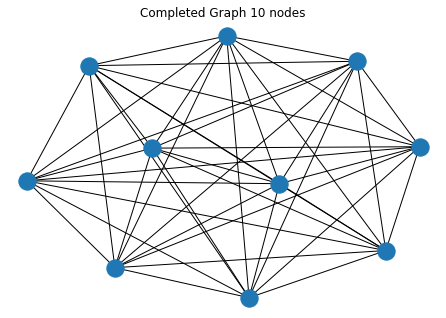

this is the Radius for our Completed Graph 10 Nodes
1
this is the diameter of our Completed Graph 10 Nodes
1


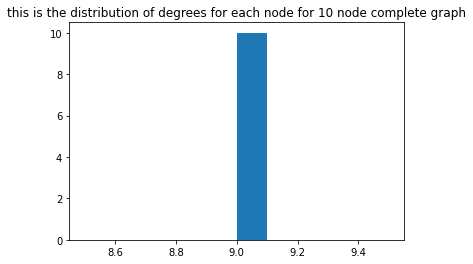

In [62]:
import itertools
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import random


c4_leaves = np.arange(1,10)
V_ex = c4_leaves
G_ex = nx.Graph() 
G_ex.add_nodes_from(V_ex)
G_ex = nx.complete_graph(10)

nx.draw(G_ex)
plt.title("Completed Graph 10 nodes")
plt.show()
print("this is the Radius for our Completed Graph 10 Nodes")
print(nx.radius(G_ex))
print("this is the diameter of our Completed Graph 10 Nodes")
print(nx.diameter(G_ex))

plt.hist(dict(nx.degree(G_ex)).values())
plt.title("distribution of degrees for each node for 10 node complete graph")
plt.show()

Now doing the completed graph for 20 notes 

this is the Radius for our Completed Graph 20 Nodes
1
this is the diameter of our Completed Graph 20 Nodes
1


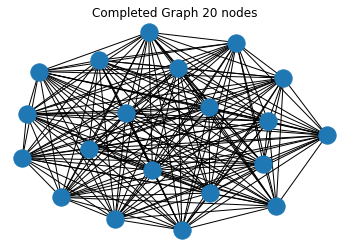

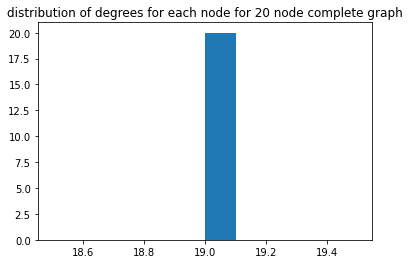

In [65]:

c42_leaves = np.arange(1,20)
V_ex2 = c4_leaves
G_ex2 = nx.Graph() 
G_ex2.add_nodes_from(V_ex)
G_ex2 = nx.complete_graph(20)
plt.title("Completed Graph 20 nodes")
nx.draw(G_ex2)
print("this is the Radius for our Completed Graph 20 Nodes")
print(nx.radius(G_ex2))
print("this is the diameter of our Completed Graph 20 Nodes")
print(nx.diameter(G_ex2))
plt.show()
print(" ")

plt.hist(dict(nx.degree(G_ex2)).values())
plt.title("distribution of degrees for each node for 20 node complete graph")
plt.show()

So the radius of a graph only exists if the diameter exists, and the diameter of a graph is the maximum distance between the pair of vertices. Way to solve it is to find all the paths and then find the maximum of all.

because A complete graph is a graph in which each pair of graph vertices is connected by an edge, and both of these are completed graphs, the diameter for both graphs is by definition 1, as each ntoe is connected to all others. 

The radius of graph exists only if it has a diameter. The minimum among all the maximum distances between a vertex to all other vertices is considered as the radius of the graph. So in complete graphs, the radius must be equal to the diameter, so in both above cases, the radius is also 1. 

The node degree is the number of edges adjacent to the node. so in both of these graphs, because they are complete, the degree of each node is n-1, because each node is reached by each of the other nodes excluding itself 


##### now for cycle graphs

this is the Radius for our Completed Graph 10 Nodes
5
this is the diameter of our Completed Graph 10 Nodes
5


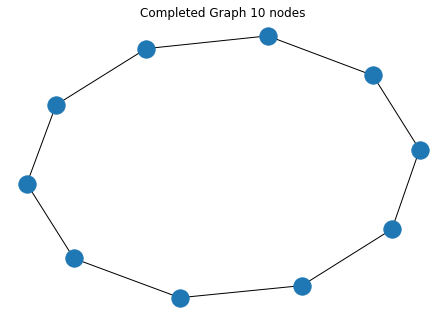

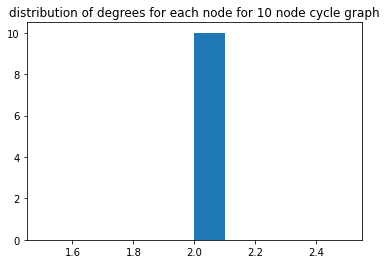

In [67]:
c4_leaves = np.arange(1,10)
V_ex = c4_leaves
G_ex = nx.Graph() 
G_ex.add_nodes_from(V_ex)
G_ex = nx.cycle_graph(10)


print("this is the Radius for our Completed Graph 10 Nodes")
print(nx.radius(G_ex))
print("this is the diameter of our Completed Graph 10 Nodes")
print(nx.diameter(G_ex))
nx.draw(G_ex)
plt.title("Completed Graph 10 nodes")
plt.show()
print(" ")
plt.hist(dict(nx.degree(G_ex)).values())
plt.title("distribution of degrees for each node for 10 node cycle graph")
plt.show()

this is the Radius for our Completed Graph 20 Nodes
10
this is the diameter of our Completed Graph 20 Nodes
10


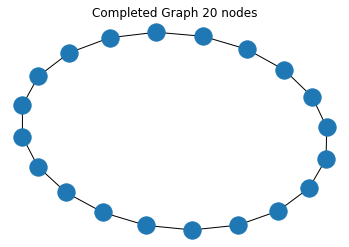

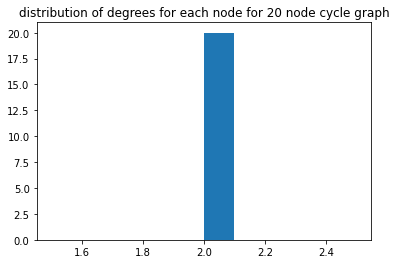

In [72]:
#cycle graph 20 nodes 

c42_leaves = np.arange(1,20)
V_ex2 = c4_leaves
G_ex2 = nx.Graph() 
G_ex2.add_nodes_from(V_ex)
G_ex2 = nx.cycle_graph(20)

print("this is the Radius for our Completed Graph 20 Nodes")
print(nx.radius(G_ex2))
print("this is the diameter of our Completed Graph 20 Nodes")
print(nx.diameter(G_ex2))
plt.title("Completed Graph 20 nodes")
nx.draw(G_ex2)
plt.show()
print(" ")
plt.hist(dict(nx.degree(G_ex2)).values())
plt.title("distribution of degrees for each node for 20 node cycle graph")
plt.show()

So given our definitions above of radius and diameter, it only makes sense that for these circular graphs, that for each graph, the radius and diameter are half of the number of total nodes in the graph. This is because to get to the farthest away note, you must travel half way around the circle. And because it is an undirected graph, we can travel either way, so the maximum distance, which is the main determinant for the diameter and therefore the radius, is half the number of nodes in each  graph

both sets of cycle graphs have the same degree for all of their nodes, because they are all circles, each node is only touched by two of the other nodes, so it only has two paths to that node, so each node will have a degree of 2

In [22]:
'''Now looking at random graphs '''

'Now looking at random graphs '

In [32]:
#first we will make some helper functions 

In [28]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G
    

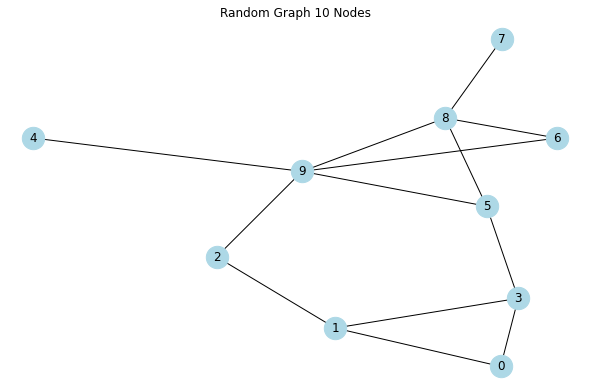

this is the diameter of random graph 10 nodes
4
This is the radius of random grpah 10 nodes
2
 


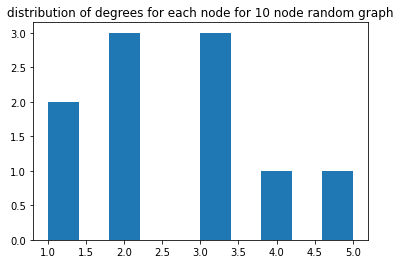

In [75]:
nodes = 10 #random.randint(5,10)
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)
plt.title("Random Graph 10 Nodes")
plt.show()
print("this is the diameter of random graph 10 nodes")
print(nx.diameter(G))
print("This is the radius of random grpah 10 nodes")
print(nx.radius(G))
print(" ")
plt.hist(dict(nx.degree(G)).values())
plt.title("distribution of degrees for each node for 10 node random graph")
plt.show()


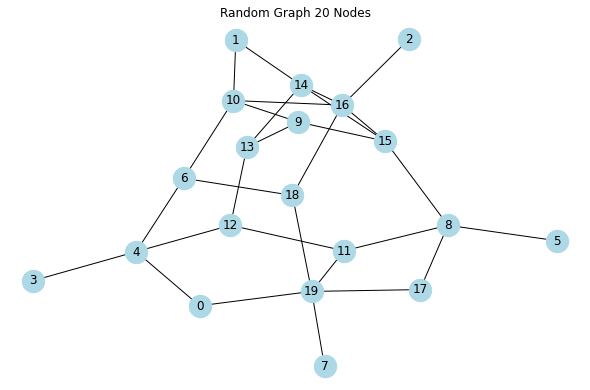

this is the diameter of random graph 20 nodes
5
This is the radius of random grpah 20 nodes
4
 


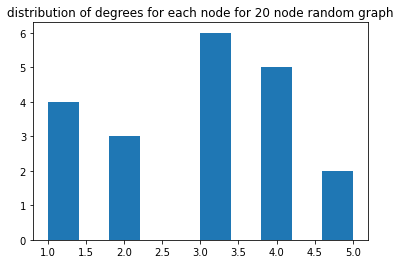

In [76]:
nodes = 20 #random.randint(5,10)
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)
plt.title("Random Graph 20 Nodes")
plt.show()
print("this is the diameter of random graph 20 nodes")
print(nx.diameter(G))
print("This is the radius of random grpah 20 nodes")
print(nx.radius(G))
print(" ")
plt.hist(dict(nx.degree(G)).values())
plt.title("distribution of degrees for each node for 20 node random graph")
plt.show()

this is pretty interesting I think. So the diameter and radius for the random 10 node graph are 4 and 2 respectively, and for the the 20 node graph it is 4 and 3. so actually pretty similar, even though the "complexity" of the 20 node graph is like way higher. 

the degrees here are interesting, each graph, the 20 and 10 have from 1 to 5 degrees in their nodes. the nodes with the highest degree will be the radius nodes. they will be the nodes that can touch and reach the most nodes the fastest, so the higher the degree, potentially the lower the radius would be for a grpah

this is diameter lattice 10 nodes
5
this is the radius lattice 10 nodes
3


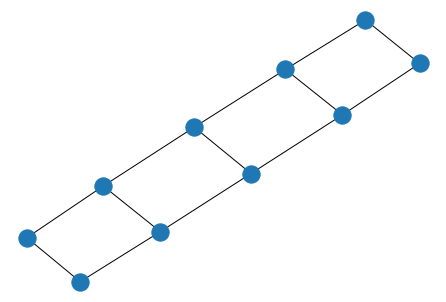

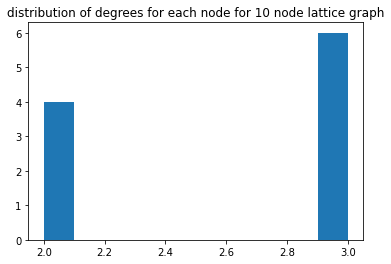

In [79]:
from networkx import grid_graph

G = grid_graph(dim=(range(0, 2), range(0, 5)))
nx.draw(G)
print("this is diameter lattice 10 nodes")
print(nx.diameter(G))
print("this is the radius lattice 10 nodes")
print(nx.radius(G))
plt.show()
print(" ")
plt.hist(dict(nx.degree(G)).values())
plt.title("distribution of degrees for each node for 10 node lattice graph")
plt.show()

this is diameter lattice 20 nodes
7
this is the radius lattice 20 nodes
4


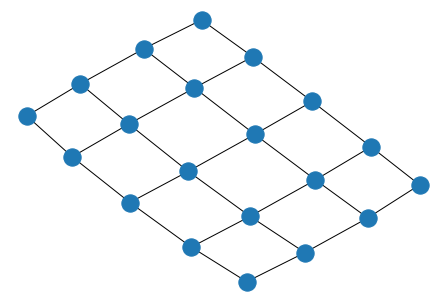

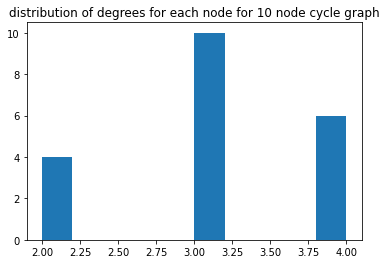

In [80]:
from networkx import grid_graph

G2 = grid_graph(dim=(range(0, 4), range(0, 5)))
nx.draw(G2)
print("this is diameter lattice 20 nodes")
print(nx.diameter(G2))
print("this is the radius lattice 20 nodes")
print(nx.radius(G2))
plt.show()
print(" ")
plt.hist(dict(nx.degree(G2)).values())
plt.title("distribution of degrees for each node for 10 node cycle graph")
plt.show()

As I understand it, Lattice graphs are like the connect 4 grid board just on a larger scale. So here the diameters and radiie (I'm not entirely sure what the plural of radius is lol) are functions of the graphs. Like how var is it to get across the whole graph, for the 10 node graph, the diameter is 5 because with only one other dimention, it has to essentially travel all the way across the map to get to the other corner. where because the 20 dimensional graph has more X and y verticies if you will, then it is able to traverse the graph easier than having to simply go all the way around, which is why you double the "complexity" of the graph, but only increase the diameter by 2

the degrees here make sense, if it is in the middle of the 20 node graph, it has 4 nodes next to it, if it is on the edge it has 3 and if it is a corner it has 2, the same is true for the 10 node graph?